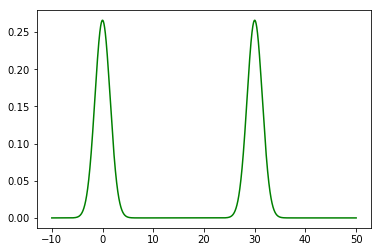

In [1]:
import math
import random
import numpy as np
from matplotlib import mlab
from matplotlib import pylab as plt
%matplotlib inline

# Построение графика композиции гауссианов с заданными параметрами и определение функции вычисления её значения: 

def gaussian(omg,sgm,omg0):
    return (1/(sgm*math.sqrt(2*math.pi)))*math.exp(-(omg-omg0)**2/(2*sgm**2))

def gaussComp(omg, sgm, omg0):
    r = 0
    for i in range(len(sgm)):
        r = r + gaussian(omg, sgm[i], omg0[i])
    return r

sigma = [1.5, 1.5]
omega_0 = [0, 30]

dOmega = 0.01
omegaMin = -10
omegaMax = 50

omegaList = mlab.frange (omegaMin, omegaMax, dOmega)
gaussList = [gaussComp(omega, sigma, omega_0) for omega in omegaList]

plt.plot (omegaList, gaussList,'green')

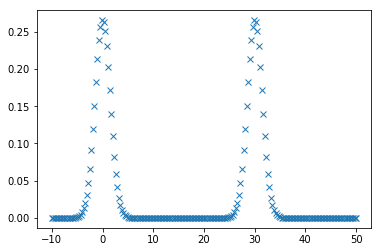

In [2]:
# выборка из "непрерывной" композиции гауссианов с заданными параметрами тренировочного набора данных:
dOmegaTrain = 0.3

omegaTrain = mlab.frange(omegaMin, omegaMax, dOmegaTrain)
gaussTrain = [gaussComp(omega, sigma, omega_0) for omega in omegaTrain]

plt.plot (omegaTrain, gaussTrain,'x')

#Учебный набор в виде списка списков:
trainData = [[omega] for omega in omegaTrain]
m = len(omegaTrain)
for i in range(m):
    trainData[i].append(gaussTrain[i])

#Пусть так же известно и колическо гауссианов в комбинации, так уже легко можно будет построить гипотезу:
gaussN = len(sigma)

#Запишем в отдельную переменную длину учебного набора:
m = len(omegaTrain)
#Параметр определяющий количество последовательных узлов для формирования mini-batch набора
L = 4

In [3]:
def J(sgm, omg0): #Весовая функция, в виде суммы квадратов разности значений гипотезы и заданной функции в узлах. Пакетная.
    cost = 0
    for i in range(m):
        omg = trainData[i][0]
        y = trainData[i][1]
        cost = cost + (1/(2*m))*(gaussComp(omg, sgm, omg0)-y)**2
    return cost

#Функции вычисления частных производных. К счастью, переменные каждого отдельного гауссиана встречаются только в них, поэтому 
#производные не отличаются от производных для одного единственного гауссиана.

def JSmg_Der(k, sgm, omg0): # Частная производная функции J по sigma
    der  = 0
    for i in range(L):
        omg = trainData[k+i][0]
        y = trainData[k+i][1]
        der = der + (1/L)*(gaussian(omg, sgm, omg0)-y)*((-1/(math.sqrt(2*math.pi)*sgm**2))*math.exp(-(omg-omg0)**2/(2*sgm**2)) + gaussian(omg, sgm, omg0)*((omg-omg0)**2/sgm**3))
    return der
    
    

def Jomg0_Der(k, sgm, omg0): # Частная производная функции J по omega0
    der = 0
    for i in range(L):
        omg = trainData[k+i][0]
        y = trainData[k+i][1]
        der = der + (1/L)*(gaussian(omg, sgm, omg0)-y)*gaussian(omg, sgm, omg0)*(omg-omg0)*(1/(sgm**2))
    return der



In [4]:
alpha = 0.5 #скорость обучения

# Стартовый набор коэффицентов проинициализируем единицами(нулями нельзя, т.к. сигма встречается в знаменателе, и получим ошибку)
# А так же костыль для временного набора параметров, нулями
#prm = []
#prmTemp0 = []
#for i in range(gaussN):
#    prm.append([1, 1])
#    prmTemp0.append([0, 0])

prm = [[1, 2], [5, 35]]

prmTemp0 = [[0,0],[0,0]]    
    


prmTemp = prmTemp0
for i in range(100000): # основной цикл реализации градиентного спуска
    k = random.randint(0,m-L-1)
    for j in range(gaussN):  
        prmTemp[j][0] = prm[j][0] - alpha * JSmg_Der(k, prm[j][0], prm[j][1])
        prmTemp[j][1] = prm[j][1] - alpha * Jomg0_Der(k, prm[j][0], prm[j][1])
    prm = prmTemp
    prmTemp = prmTemp0


    
#Разделим лист параметров на отдельные листы для сигма и омега_0. 
#Удобно из-за копирования кода рассчитанного на единственный гауссиан(чтобы не переписывать производные заново)
apprSigma = []
apprOmega_0 = []
for i in range(gaussN):
    apprSigma.append(prm[i][0])
    apprOmega_0.append(prm[i][1])


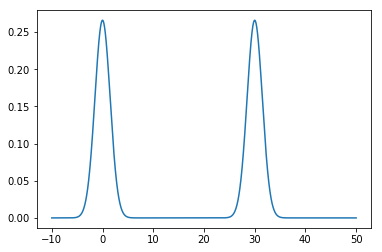

In [5]:
apprGauss = [gaussComp(omega, apprSigma, apprOmega_0) for omega in omegaList]
plt.plot(omegaList, apprGauss)

In [8]:
J(apprSigma, apprOmega_0)
prm
2+3

5

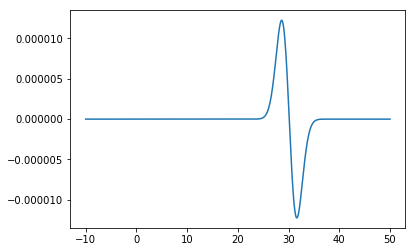

In [7]:
error = []
for i in range(len(omegaList)):
    error.append(gaussList[i] - apprGauss[i])
plt.plot(omegaList, error)